# distance to TE TSS 5 tissue consistent

Transposable elements

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# distance to TE TSS

In [2]:
%%bash
### process-specific CHM
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/CHM_intersect_table
mkdir -p distance_from_TE
for compart in A B;do
    for process in Universal_complementarySet EarlyEmbryogenesis_complementarySet EarlyEmbryogenesis_complementarySet_otherCommon PGCsDevelopment_complementarySet PGCsDevelopment_complementarySet_otherCommon Spermatogenesis_complementarySet Spermatogenesis_complementarySet_otherCommon RetinalDevelopment_complementarySet RetinalDevelopment_complementarySet_otherCommon HeartDevelopment_complementarySet HeartDevelopment_complementarySet_otherCommon LiverDevelopment_complementarySet LiverDevelopment_complementarySet_otherCommon;do
        bedtools closest -b /mnt/Storage/home/yanghui/imprinting/result.2021/Exploring/CHMsInOtherContexts/CellStateTransition/Prepare/TEUnitAssemble/mm10_te_tx_TSS.bed -a <(cut -f 1-3 intersectOnly_${process}CHM_5tissue_${compart}.bed) -d > distance_from_TE/TSS_distance_${process}CHM_${compart}.bed
    done
done

In [4]:
%%bash
### nonCHM
# cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue/nonCHM_intersect_table
# mkdir -p distance_from_TE
# for compart in A B;do
#     bedtools closest -b /mnt/Storage/home/yanghui/imprinting/result.2021/Exploring/CHMsInOtherContexts/CellStateTransition/Prepare/TEUnitAssemble/mm10_te_tx_TSS.bed -a <(cut -f 1-3 intersectOnly_nonCHM_5tissue_${compart}.bed) -d > distance_from_TE/TSS_distance_nonCHM_${compart}.bed
# done

In [3]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/ChromatinStates/Cavalli_Cell2017_ABcompartment_5tissue')
tss_distance_df = pd.DataFrame()
for compart in ['A', 'B'] :
    for t in [
                'Universal', 
                'Universal_complementarySet',
                'EarlyEmbryogenesis_complementarySet', # 'EarlyEmbryogenesis_complementarySet_otherCommon',
                'PGCsDevelopment_complementarySet', # 'PGCsDevelopment_complementarySet_otherCommon',
                'Spermatogenesis_complementarySet', # 'Spermatogenesis_complementarySet_otherCommon',
                'RetinalDevelopment_complementarySet', # 'RetinalDevelopment_complementarySet_otherCommon',
                'HeartDevelopment_complementarySet', # 'HeartDevelopment_complementarySet_otherCommon',
                'LiverDevelopment_complementarySet', # 'LiverDevelopment_complementarySet_otherCommon',
                'nonCHM'
                ] :
        t_short = 'CHM' if t != 'nonCHM' else t
        t1 = t if t != 'nonCHM' else 'non'
        df = pd.read_csv(f'{t_short}_intersect_table/distance_from_TE/TSS_distance_{t1}CHM_{compart}.bed',
                                      sep = "\t", header = None, names = [ 
                                                                          'CHM_chr', 'CHM_start', 'CHM_end', 
                                                                          'chr', 'start', 'end', 'Transcript_id', 'score', 'strand',
                                                                          'distance']
                                     )
        df['Type'] = t
        df['compart'] = compart
        tss_distance_df = pd.concat([tss_distance_df, df])
    

tss_distance_df

,CHM_chr,CHM_start,CHM_end,chr,start,end,Transcript_id,score,strand,distance,Type,compart
0,chr1,34347200,34351500,chr1,34357628,34357629,TU1313,.,+,6129,Universal,A
1,chr1,35788600,35795300,chr1,35825790,35825791,TU1386,.,+,30491,Universal,A
2,chr1,37278600,37283600,chr1,37278775,37278776,TU1700,.,-,0,Universal,A
3,chr1,38704600,38709050,chr1,38674112,38674113,TU2140,.,-,30488,Universal,A
4,chr1,57586600,57588800,chr1,57543913,57543914,TU2584,.,+,42687,Universal,A
...,...,...,...,...,...,...,...,...,...,...,...,...
815,chr9,124422000,124423000,chr9,124422824,124422825,TU166342,.,+,0,nonCHM,B
816,chr9,124422000,124423000,chr9,124422824,124422825,TU166345,.,+,0,nonCHM,B
817,chr9,124422000,124423000,chr9,124422824,124422825,TU166347,.,+,0,nonCHM,B
818,chr9,124422000,124423000,chr9,124422824,124422825,TU166350,.,+,0,nonCHM,B


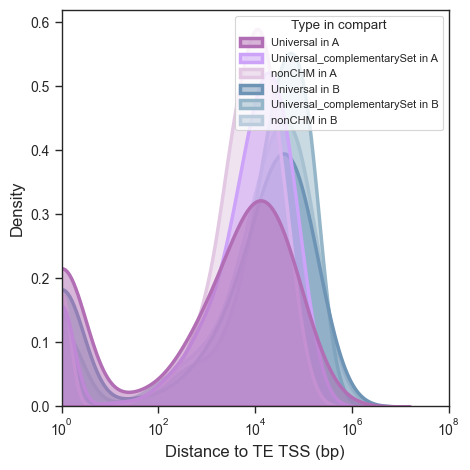

In [5]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 12,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 8
                         }):
    df = tss_distance_df.copy().reset_index()
    df = df.loc[df['Type'].isin(['Universal', 'Universal_complementarySet', 'nonCHM'])]
    df['distance'] = df['distance'] + 1
    df['Type in compart'] = df['Type'] + ' in ' + df['compart']
    fig, axes = plt.subplots(figsize = (6.4 * .75, 4.8 * 1), tight_layout = True, sharex = True)
    ax = axes
    sns.kdeplot(
        data=df, 
        x="distance", 
        hue="Type in compart",
       fill=True, common_norm=False, palette=['#B26EB5', '#CDA2F9', '#E2C8E3', '#6E94B5', '#94B6C8', '#BBCDDC'],
       alpha=.5, linewidth=2.5,
        ax = ax,
        log_scale = True
    )
#         sns.move_legend(ax, "upper left")
    ax.set_xlim(1,100000000)
#         ax.set_title(f'Distance of universal CHM to nearest TSS of genes\n({cell_type})')
#         ax.set_yscale('log')
#     ax.set_ylabel(f'Density of {t}')
    ax.set_xlabel('Distance to TE TSS (bp)')
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_kde_universalComplementaryNonCHM_ABcompart_distance_to_TETSS_5tissue_consistent.pdf', transparent = True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PGCSpecificCHM_A v.s. PGCSpecificCHM_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.931e-04 U_stat=7.145e+02
EarlyEmbryoSpecificCHM_A v.s. EarlyEmbryoSpecificCHM_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.394e-11 U_stat=6.025e+04
SpermSpecificCHM_A v.s. SpermSpecificCHM_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.843e-12 U_stat=1.028e+05
RetinalSpecificCHM_A v.s. RetinalSpecificCHM_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.605e-07 U_stat=4.007e+05
HeartSpecificCHM_A v.s. HeartSpecificCHM_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.503e+03
LiverSpecificCHM_A v.s. LiverSpecificCHM_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val

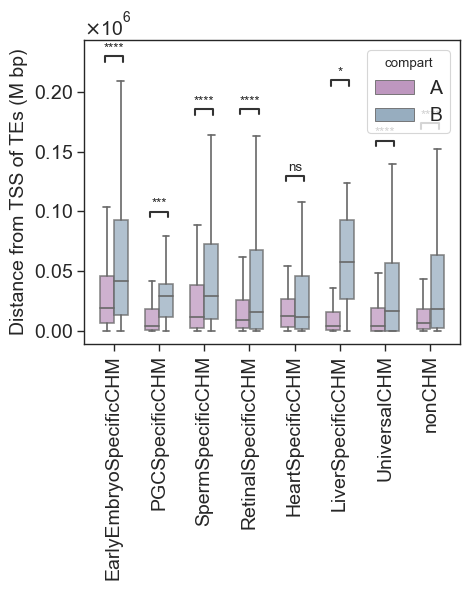

In [7]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 14,
                             'ytick.labelsize': 14,
                             'legend.fontsize': 14,
                             'legend.title.fontsize': 14
                         }):

            
    fig, ax = plt.subplots(figsize = (6.4 * .75, 4.8 * 1.25), tight_layout = True)
    sns.boxplot(
        data = tss_distance_df,
        x = 'Type',
        y = 'distance',
        hue = 'compart',
        ax = ax,
        showfliers = False,
        width = 0.618,
        palette = ['#C490C6', '#90ADC6'],
        boxprops=dict(alpha=.75),
        flierprops={"marker": "x", "markersize": 1},
    )
    add_stat_annotation(ax, data=tss_distance_df, x='Type', y='distance', hue = 'compart',
                        box_pairs=[((x.get_text(), 'A'), (x.get_text(), 'B')) for x in ax.get_xticklabels()],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
#     h,l = ax.get_legend_handles_labels()
#     ax.legend(h,l, loc = 'lower left', title = "", bbox_to_anchor=(.65, .75))

    ax.set_ylabel('Distance from TSS of TEs (M bp)')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 
    ax.set_xlabel('')
    ax.ticklabel_format(axis = 'y', style = 'scientific', useMathText=True, scilimits = [6,6])
    
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_box_universalProcessSpecificNonCHM_distance_to_TE_5tissue_consistent.pdf', transparent = True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

intersect_A v.s. intersect_B: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.962e-20 U_stat=3.173e+05


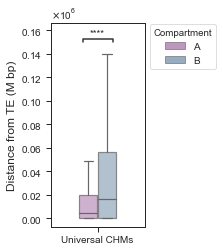

In [5]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    df = pd.DataFrame()
    distance_ls = []
    compart_ls = []
    cell_type_ls = []
    for cell_type in ['intersect'] :
        for compart in ['A', 'B'] :
            distance_ls += te_distance_df[cell_type].loc[te_distance_df[cell_type]['compart_type'] == compart]['distance'].tolist()
            compart_ls += [compart] * te_distance_df[cell_type].loc[te_distance_df[cell_type]['compart_type'] == compart].shape[0]
            cell_type_ls += [cell_type] * te_distance_df[cell_type].loc[te_distance_df[cell_type]['compart_type'] == compart].shape[0]
            
    df['Distance from TE'] = distance_ls
    df['Cell type'] = cell_type_ls
    df['Compartment'] = compart_ls
            
#     fig, ax = plt.subplots(figsize = (6.4, 4.8), tight_layout = True)
    fig, ax = plt.subplots(figsize = (6.4 * .5, 4.8 * .75), tight_layout = True)
    sns.boxplot(
        data = df,
        x = 'Cell type',
        y = 'Distance from TE',
        hue = 'Compartment',
        ax = ax,
        showfliers = False,
        width = 0.5,
        palette = ['#C490C6', '#90ADC6'],
        boxprops=dict(alpha=.75),
    )
    add_stat_annotation(ax, data=df, x='Cell type', y='Distance from TE', hue = 'Compartment',
                        box_pairs=[((x.get_text(), 'A'), (x.get_text(), 'B')) for x in ax.get_xticklabels()],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    h,l = ax.get_legend_handles_labels()
    ax.legend(h,l, loc = 'lower left', title = "Compartment", bbox_to_anchor=(1,.75))
#     ax.set_title('Distance of universal CHM to nearest TSS of TEs\n')
    ax.set_ylabel('Distance from TE (M bp)')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(['Universal CHMs'])
    ax.set_xlabel('')
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = [6,6], useMathText=True)
    
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_box_CHM_distance_to_TE_5tissue.pdf', transparent = True)